<a href="https://colab.research.google.com/github/NARAGA-BHARATH/Micro-IT-Internship/blob/main/Copy_of_Untitled12.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Install required packages (run once)
!pip install numpy pandas scikit-learn shap matplotlib seaborn

# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import shap
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error


In [ ]:
# Generate synthetic Carbon Fibre Reinforced Polymer (CFRP) dataset
np.random.seed(42)
n_samples = 200

data = pd.DataFrame({
    'Fibre_Volume(%)': np.random.uniform(40, 70, n_samples),
    'Fibre_Orientation(°)': np.random.choice([0, 45, 90], n_samples),
    'Curing_Temperature(°C)': np.random.uniform(80, 150, n_samples),
    'Density(g/cm³)': np.random.uniform(1.4, 1.6, n_samples)
})

# Generate tensile and compressive strength based on input features
data['Tensile_Strength(MPa)'] = (
    10 * data['Fibre_Volume(%)']
    - 0.8 * data['Fibre_Orientation(°)']
    + 0.5 * data['Curing_Temperature(°C)']
    + np.random.normal(0, 15, n_samples)
)

data['Compressive_Strength(MPa)'] = (
    8 * data['Fibre_Volume(%)']
    - 0.6 * data['Fibre_Orientation(°)']
    + 0.3 * data['Curing_Temperature(°C)']
    + np.random.normal(0, 10, n_samples)
)

data.head()


,Fibre_Volume(%),Fibre_Orientation(°),Curing_Temperature(°C),Density(g/cm³),Tensile_Strength(MPa),Compressive_Strength(MPa)
0,51.236204,90,113.192168,1.490109,466.386252,389.497394
1,68.521429,0,86.848391,1.425832,713.517193,591.933957
2,61.959818,45,114.413111,1.590810,612.742859,496.732809
3,57.959755,45,113.143024,1.521235,594.896355,488.745429
4,44.680559,90,92.124131,1.445729,421.143933,338.159232


(200, 6)
Fibre_Volume(%)              0
Fibre_Orientation(°)         0
Curing_Temperature(°C)       0
Density(g/cm³)               0
Tensile_Strength(MPa)        0
Compressive_Strength(MPa)    0
dtype: int64


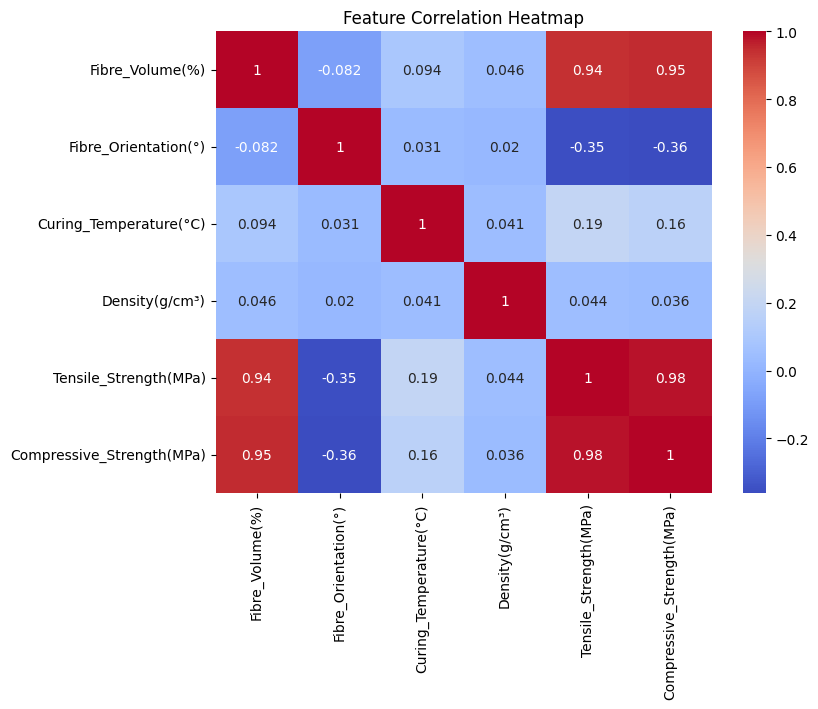

In [ ]:
# Check dataset shape and nulls
print(data.shape)
print(data.isnull().sum())

# Plot correlation heatmap
plt.figure(figsize=(8,6))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm')
plt.title("Feature Correlation Heatmap")
plt.show()


In [ ]:
# Independent variables
X = data[['Fibre_Volume(%)', 'Fibre_Orientation(°)', 'Curing_Temperature(°C)', 'Density(g/cm³)']]

# Target variable: choose Tensile strength first
y_tensile = data['Tensile_Strength(MPa)']

# Split into training and testing data
X_train, X_test, y_train, y_test = train_test_split(X, y_tensile, test_size=0.2, random_state=42)


In [ ]:
# Independent variables
X = data[['Fibre_Volume(%)', 'Fibre_Orientation(°)', 'Curing_Temperature(°C)', 'Density(g/cm³)']]

# Target variable: choose Tensile strength first
y_tensile = data['Tensile_Strength(MPa)']

# Split into training and testing data
X_train, X_test, y_train, y_test = train_test_split(X, y_tensile, test_size=0.2, random_state=42)


In [ ]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [ ]:
# Train Random Forest and Gradient Boosting models
rf_model = RandomForestRegressor(n_estimators=200, random_state=42)
gb_model = GradientBoostingRegressor(n_estimators=200, random_state=42)

rf_model.fit(X_train_scaled, y_train)
gb_model.fit(X_train_scaled, y_train)


GradientBoostingRegressor(n_estimators=200, random_state=42)

In [ ]:
# Predict using both models
rf_pred = rf_model.predict(X_test_scaled)
gb_pred = gb_model.predict(X_test_scaled)

# Evaluate performance
for name, pred in [('Random Forest', rf_pred), ('Gradient Boosting', gb_pred)]:
    print(f"\n{name} Results:")
    print("R² Score:", round(r2_score(y_test, pred), 3))
    print("MAE:", round(mean_absolute_error(y_test, pred), 3))
    print("RMSE:", round(mean_squared_error(y_test, pred)**0.5, 3))


Random Forest Results:
R² Score: 0.975
MAE: 12.568
RMSE: 14.928

Gradient Boosting Results:
R² Score: 0.98
MAE: 10.585
RMSE: 13.147


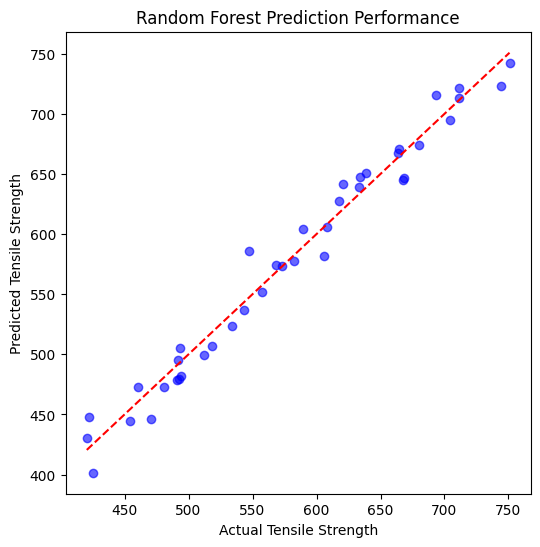

In [ ]:
plt.figure(figsize=(6,6))
plt.scatter(y_test, rf_pred, color='blue', alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel('Actual Tensile Strength')
plt.ylabel('Predicted Tensile Strength')
plt.title('Random Forest Prediction Performance')
plt.show()


/tmp/ipython-input-2460400503.py:6: FutureWarning: The NumPy global RNG was seeded by calling `np.random.seed`. In a future version this function will no longer use the global RNG. Pass `rng` explicitly to opt-in to the new behaviour and silence this warning.
  shap.summary_plot(shap_values, X_test, plot_type='bar')


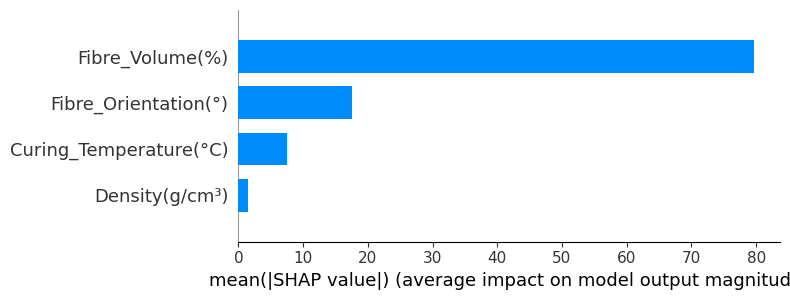

In [ ]:
# Create SHAP explainer
explainer = shap.TreeExplainer(rf_model)
shap_values = explainer.shap_values(X_test_scaled)

# Summary plot
shap.summary_plot(shap_values, X_test, plot_type='bar')


In [ ]:
# Example new sample: Fibre_Volume, Orientation, Temp, Density
new_sample = pd.DataFrame([[65, 45, 130, 1.55]],
                          columns=['Fibre_Volume(%)', 'Fibre_Orientation(°)', 'Curing_Temperature(°C)', 'Density(g/cm³)'])

# Scale and predict
new_scaled = scaler.transform(new_sample)
predicted_tensile = rf_model.predict(new_scaled)
print("Predicted Tensile Strength (MPa):", predicted_tensile[0])


Predicted Tensile Strength (MPa): 658.9476546781228


In [ ]:
# Re-train model for compressive strength prediction
y_comp = data['Compressive_Strength(MPa)']
X_train, X_test, y_train, y_test = train_test_split(X, y_comp, test_size=0.2, random_state=42)

rf_model.fit(X_train_scaled, y_train)
y_pred_comp = rf_model.predict(X_test_scaled)

print("\nCompressive Strength Model R²:", r2_score(y_test, y_pred_comp))



Compressive Strength Model R²: 0.9653767395689009


In [ ]:
data.to_csv("CFRP_Strength_Dataset.csv", index=False)
print("Dataset saved successfully as CFRP_Strength_Dataset.csv")


Dataset saved successfully as CFRP_Strength_Dataset.csv
